In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [3]:
import torch.nn as nn # OO
import torch.nn.functional as F # functional

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) # input = 28*28 and output = 64
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) # output = 10 {ten digits}
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0216, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.3588, grad_fn=<NllLossBackward>)


In [40]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(f"Accuracy: {round(correct/total, 3)*100}%")

Accuracy: 97.5%


In [41]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [42]:
y

tensor([7, 3, 0, 4, 2, 2, 8, 8, 0, 8])

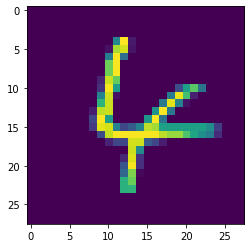

In [50]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28, 28))

In [51]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(4)
